## Black-Scholes Model

The Black-Scholes equation is used to model the price evolution of European call and put options and derives from the no-arbitrage condition in a continous time,continous state market

- European Call Option are a financial derivative that gives the buyer the right but not the pobnlligation to buy a stock or other asset at a specified price (strike price) on a specific date(expiration date)

- European option are different to American option because they can only be exercised on the expiration date compared to American ones that can be exercised any time before expiration

- A no arbitrage condition is essentially stating that equivalent assets should sell for the same price to prevent a risk free profit from simply buying and sellling them(arbitrage).Black-Scholes model assumes there are no oppurtunities to make risk free profits through simple buying and selling strategies

- Continuous Time,Continous State Market assumes that tradin happens continously over time and that the prices of the underlying assets can vary continuously.

Black-Scholes is derived from these assumptions.

### Black-Scholes Equation (PDE)

$$
\frac{\partial V}{\partial t} + \frac{1}{2} \sigma^2 S^2 \frac{\partial^2 V}{\partial S^2} + rS \frac{\partial V}{\partial S} - rV = 0
$$

$V$ - This is the price of the derivative.It represents the current theoretical value of the option based on other underlying variables

$t$ - Time until the option expires

$S$ - The current stock price 

$ \sigma$ - Representws the volatility of the stock price.A higher $\sigma$ means the stock is morre volatile.More volatile means the value of the option increases because of the higher risk.

$r$ - The risk free interest rate is the theoretical rate of return of an invesment with zero risk


#### Intuition

$ \frac{\partial V}{\partial t}$ - measures how the price of the option is expected to change as time moves closer to the options expiration.Also called the time decay of an option

$\frac{1}{2} \sigma^2 S^2 \frac{\partial^2 V}{\partial S^2}$ - Represents how sensitive an option is to changes in the price of an underlying asset.It captured the effects of volatility by looking at the curvature of the option value with respect to the stock price changes

$rS \frac{\partial V}{\partial S}$- Represents the cost of holding the underlying asset, essentially rhe expected return on the stock multiplied by the options sensitivity to stock price changes

$-rV$ - Reprresents the cost of financing the position.it shows the decrease in option value to to the passage of time.It is the money you would theorretically learn iof you invested the money at the risk-free rate instead of holding the option

### Black-Scholes Formula
This is the specific solution to the Black-Scholes PDE that applies to European call and put options.This formula provides the closed-form expression which can be used to directly calculate the fair price of these options based on the inputs without needing to solve the DE.

The formulas for a European call option is : 
$$
C = S_0 N(d_1) - X e^{-rT} N(d_2)
$$
 
The formula for a European put option is given by:
$$
P = X e^{-rT} N(-d_2) - S_0 N(-d_1)
$$

$C,P$ - the call and put option prices repectively

$S_0$ - the current stock price

$X$ - the strike price

$T$ - time till expiration

$N()$ - is the cumulative distribution function for a standard normal distribuition

$d_1$,$d_2$ - the intermediate calculations based on other variables

The formulas for d_1 and d_2 in the Black-Scholes model are given by:

$$ d_1 = \frac{\log(\frac{S_0}{X}) + (r + \frac{\sigma^2}{2})T}{\sigma \sqrt{T}} $$

$$ d_2 = d_1 - \sigma \sqrt{T} $$

where:

$\sigma$ - volatility of the stocks returns



#### Intuition
$S_0 N(d_1)$ - represents the expected benefit from purchasing the stock outright if the stock price exceeds the strike price at expiration. The N(d1) factor is like an expected value it weights the curent stock price by the likelihood the option will be in the money ie stock price is above the strike price at expiration

$X e^{-rT}$ - This term represents the present value of the strike price adjusted by the probability that the option will be exercised. The exponential term is about discounting, we need it to calculate the strike price' present value, how much it would be worth in the present day.r is the risk free interest rate and T isa the time to expirration.The exponent applies exponsntial decay to see how the money descreased in value over time ie discounting.

$ N(d_2)$ This cumalitive normal distribution provides a probability value.It gives us the probability that the option will be in the money.

#### What is the difference between N(d1) and N(d2)

$N(d1)$ - The probabilty the stock price $S_0$ will be above the strike price at the expiration date

$N(d2)$ - reprresents the probabily that the option will actually be exercised.Ie it will be profitable to exercise the option

additional note - the values of d1 and d2 are normalised so they are compatible with the standard normal distribution


### Defining Black-Scholes  Formula Function

In [4]:
import numpy as np
from scipy.stats import norm

In [11]:
def black_scholes_call(S,X,T,r,sigma):
    '''This function calculates the call price using the black scholes formula and known parameters'''
    #calculate d1,d2
    d1 = ( np.log(S/X) + (r + (sigma**2 / 2))*T ) / ( sigma * np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    
    call_price = S * norm.cdf(d1) - X * np.exp(-1*r*T) * norm.cdf(d2)
    
    return call_price


def black_scholes_put(S,X,T,r,sigma):
    '''This function calculates the put price using the black scholes formula and known parameters'''
    #calculate d1,d2
    d1 = ( np.log(S/X) + (r + (sigma**2 / 2))*T ) / ( sigma * np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    
    put_price = X * np.exp(-1*r*T) * norm.cdf(-1*d2) - S * norm.cdf(-1*d1)
    
    return put_price


#### Simple Calculation

In [18]:
# Example parameters
S = 100       # current stock price
X = 100       # strike price
T = 1         # time to expiration (1 year)
r = 0.05      # risk-free rate (5% per year)
sigma = 0.2   # volatility (20%)

# Calculate call and put prices
call_price = black_scholes_call(S, X, T, r, sigma)
put_price = black_scholes_put(S, X, T, r, sigma)

print(f"Call Option Price: {call_price:.2f}")
print(f"Put Option Price: {put_price:.2f}")

Call Option Price: 10.45
Put Option Price: 5.57


## Estimating Call and Put prices using a Monte-Carlo Simulation

### Random Walk Hypothesis 
- The random walk hypothesis sugghests that stock prices evolve randomly and unpredicitibly over time.This is modelled using Geometric Brownian Motion (GBM) in the Black-Scholes framework.

### Geometric Brownian Motion
- GBM is used to model stock price dynamics because it captures the continous and stochastic nature of market movements.
- It is modelled by the formula below:
$$dS_t = \mu S_t \, dt + \sigma S_t \, dW_t$$

$dS_t$- represents the stock price at t time, this is our target value to simulate

$\mu$ - This is the drift of the stock price, it is the average expected return of the stok per unit of time.Essentially its the direction the stock price is expected to go on average

$\sigma$ - The volatility of the stock measures how much the stock price is expected to fluctuate around its mean or drift. A higher voolatility means the stock price can change drastically in a short period and vice versa.

$dW_t$ - The increment of Brownian motion which represents the random componant of stock price movements.A Browniant motion is a continous time stochastic process with independent normally distributed increments.

#### Intuition:
- The formula captures the predicitable trend using $\mu S_t \, dt  $ and the unpredictable spikes using $\sigma S_t \, dW_t$

### Log-Normal Distribution
- Stock prices modelled by GBM are said to be log-normally distributed ie , the stock price itself doesnt follow a normal distribution but the logarithm of the stock price does.This property comes from the exponential function in the GBM solution below

$$
S_T = S_0 \exp \left( \left( \mu - \frac{\sigma^2}{2} \right) T + \sigma T Z \right)
$$

where:

$S_0$ - Initial Stock Price

$Z$ - A random draw from a standard normal distribution which introduces the random variation in the simulation

$ \left( \mu - \frac{\sigma^2}{2} \right) T $ - Adjusts the ddrift to account for the volatility drag.A correction factor to pull mean of log normal distribution downwards

### Option Payoff
call option - Gives the holder the right to buy the asset at a strike price X.The payoff is the greater of zero or the difference between the stock price at expiration $S_t$ and the strike price 

put option - gives the holder the right to sell the asset at X.The payoff is zero or the differece between the strike price and ther stock price at expiration.

note: remember a call you want stock to go up, put you want stock to go down

### Expected Payoff and Discounting
- Under risk neutral valuation the expected return of a stock $\mu$ is replaced by the risk free rate r nbecause it is assumed that all investors are risk-neutral ie they dont need extra compensation for risk so like before the discounted expected payoff is :

$$\text{Present Value} = e^{-rT} \times \text{Expected Payoff at } T$$


- we take the constant value r rather than the variable $\mu$

### Monte Carlo Simulation

In [84]:
#### Define basic Parameters

S = 100 #Initial Stock Price
X = 100 #Strike Price
r = 0.03 #Risk Free rate
sigma = 0.1 # volatility
T = 1 # Time till expiration

# Simulate Stock prices at Expiration
rand = np.random.standard_normal(50)
T = np.linspace(0,1,50)
len(T)

50

In [85]:
def geo_brownian_motion(S,X,r,sigma,T,Z):
    
    S_t = S * np.exp((r - (sigma**2)/2)*T + sigma*np.sqrt(T)*Z)
    return S_t

def calc_payoff
    


In [86]:
y = geo_brownian_motion(S,X,r,sigma,T,rand)

In [87]:
import matplotlib.pyplot as plt

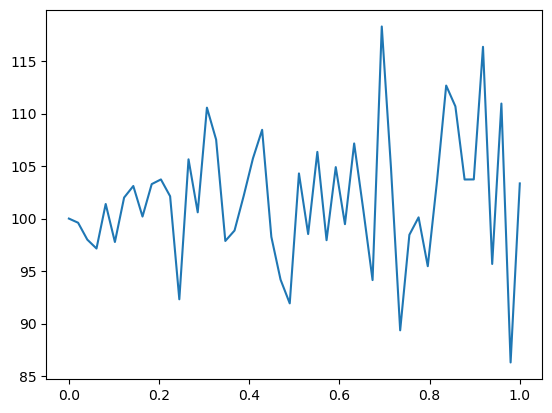

In [88]:
plt.plot(T,y)